In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data of Seattle Airbnb
dfSEA_calendar = pd.read_csv('Seattle/calendar.csv')
dfSEA_listing = pd.read_csv('Seattle/listings.csv')
dfSEA_reviews = pd.read_csv('Seattle/reviews.csv')

In [3]:
# calendar dataset
dfSEA_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
# listing dataset
dfSEA_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
#reviews dataset
dfSEA_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
print('*** Seattle Airbnb ***')
print('\n- Calendar information:')
print(dfSEA_calendar.info())
print('\n- Listing information:')
print(dfSEA_listing.info())
print('\n- Reviews information:')
print(dfSEA_reviews.info())

*** Seattle Airbnb ***

- Calendar information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None

- Listing information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name              

### Clean Calendar Dataset

In [7]:
# total null values of Price column
print('Total null values of the Price column is {}'.format(dfSEA_calendar.isnull().sum()['price']))

Total null values of the Price column is 459028


In [8]:
# no. of null values of Price column when Available column is False
print("Number of null values of the Price column when the apartments/homestays are not available is {}".format(
    dfSEA_calendar[dfSEA_calendar['available']=='f']['price'].isnull().count()))

Number of null values of the Price column when the apartments/homestays are not available is 459028


- The result above shows that the price will be missing only if the apartments/homestays are not available for that day. Therefore, we can consider filling those missing values with $0.

In [9]:
# fill NaN values of Price column with $0
dfSEA_calendar = dfSEA_calendar.fillna('$0')
dfSEA_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       1393570 non-null  object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [10]:
# change types of the columns 
# convert listing_id to string
dfSEA_calendar['listing_id'] = dfSEA_calendar['listing_id'].astype(str)

# convert date to datetime
dfSEA_calendar['date'] = dfSEA_calendar['date'].astype('datetime64[ns]')

# remove the '$' and ',' in the price and convert it to float 
dfSEA_calendar['price'] = dfSEA_calendar['price'].apply(lambda x: x.translate({ ord(c): None for c in "$," })).astype(float)

In [11]:
dfSEA_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  object        
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       1393570 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 42.5+ MB


### Clean Listing Dataset 

In [12]:
# select some important features
dfSEA_listing_new = dfSEA_listing[['id', 'name', 'host_response_time',
       'host_response_rate', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price',
       'cleaning_fee', 'minimum_nights', 'number_of_reviews', 'review_scores_rating',
       'cancellation_policy']]

dfSEA_listing_new.head()

,id,name,host_response_time,host_response_rate,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,bed_type,amenities,price,weekly_price,monthly_price,cleaning_fee,minimum_nights,number_of_reviews,review_scores_rating,cancellation_policy
0,241032,Stylish Queen Anne Apartment,within a few hours,96%,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,NaN,1,207,95.0,moderate
1,953595,Bright & Airy Queen Anne Apartment,within an hour,98%,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,...,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,"$1,000.00","$3,000.00",$40.00,2,43,96.0,strict
2,3308979,New Modern House-Amazing water view,within a few hours,67%,47.629724,-122.369483,House,Entire home/apt,11,4.5,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,NaN,NaN,$300.00,4,20,97.0,strict
3,7421966,Queen Anne Chateau,NaN,NaN,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,...,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,$650.00,"$2,300.00",NaN,1,0,NaN,flexible
4,278830,Charming craftsman 3 bdm house,within an hour,100%,47.632918,-122.372471,House,Entire home/apt,6,2.0,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,NaN,NaN,$125.00,1,38,92.0,strict


In [13]:
dfSEA_listing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3818 non-null   int64  
 1   name                  3818 non-null   object 
 2   host_response_time    3295 non-null   object 
 3   host_response_rate    3295 non-null   object 
 4   latitude              3818 non-null   float64
 5   longitude             3818 non-null   float64
 6   property_type         3817 non-null   object 
 7   room_type             3818 non-null   object 
 8   accommodates          3818 non-null   int64  
 9   bathrooms             3802 non-null   float64
 10  bedrooms              3812 non-null   float64
 11  beds                  3817 non-null   float64
 12  bed_type              3818 non-null   object 
 13  amenities             3818 non-null   object 
 14  price                 3818 non-null   object 
 15  weekly_price         

In [14]:
dfSEA_listing_new.isnull().sum()

id                         0
name                       0
host_response_time       523
host_response_rate       523
latitude                   0
longitude                  0
property_type              1
room_type                  0
accommodates               0
bathrooms                 16
bedrooms                   6
beds                       1
bed_type                   0
amenities                  0
price                      0
weekly_price            1809
monthly_price           2301
cleaning_fee            1030
minimum_nights             0
number_of_reviews          0
review_scores_rating     647
cancellation_policy        0
dtype: int64

In [15]:
# change types of columns 
# remove the '$' and ',' in the price and convert it to float 
dfSEA_listing_new['price'] = dfSEA_listing_new['price'].apply(lambda x: x.translate({ ord(c): None for c in "$," })).astype(float)

# convert id column to string
dfSEA_listing_new['id'] = dfSEA_listing_new['id'].astype(str)

# fill NaN values of host_response_rate and host_response_time 
dfSEA_listing_new['host_response_time'] = dfSEA_listing_new['host_response_time'].replace(np.nan, 'Others')
dfSEA_listing_new['host_response_rate'] = dfSEA_listing_new['host_response_rate'].fillna('0%')

# convert host_response_rate to float
dfSEA_listing_new['host_response_rate'] = dfSEA_listing_new['host_response_rate'].apply(lambda x: float(x.split('%')[0])/100)

In [16]:
dfSEA_listing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3818 non-null   object 
 1   name                  3818 non-null   object 
 2   host_response_time    3818 non-null   object 
 3   host_response_rate    3818 non-null   float64
 4   latitude              3818 non-null   float64
 5   longitude             3818 non-null   float64
 6   property_type         3817 non-null   object 
 7   room_type             3818 non-null   object 
 8   accommodates          3818 non-null   int64  
 9   bathrooms             3802 non-null   float64
 10  bedrooms              3812 non-null   float64
 11  beds                  3817 non-null   float64
 12  bed_type              3818 non-null   object 
 13  amenities             3818 non-null   object 
 14  price                 3818 non-null   float64
 15  weekly_price         

### Clean Reviews Dataset

In [17]:
dfSEA_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [18]:
dfSEA_reviews = dfSEA_reviews.dropna(subset=['comments'])
dfSEA_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84831 non-null  int64 
 1   id             84831 non-null  int64 
 2   date           84831 non-null  object
 3   reviewer_id    84831 non-null  int64 
 4   reviewer_name  84831 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.5+ MB


In [19]:
# change types of columns
# convert IDs to string
dfSEA_reviews['listing_id'] = dfSEA_reviews['listing_id'].astype(str)
dfSEA_reviews['id'] = dfSEA_reviews['id'].astype(str)
dfSEA_reviews['reviewer_id'] = dfSEA_reviews['reviewer_id'].astype(str)

# convert date to datetime
dfSEA_reviews['date'] = dfSEA_reviews['date'].astype('datetime64[ns]')

In [20]:
dfSEA_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84831 non-null  object        
 1   id             84831 non-null  object        
 2   date           84831 non-null  datetime64[ns]
 3   reviewer_id    84831 non-null  object        
 4   reviewer_name  84831 non-null  object        
 5   comments       84831 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 4.5+ MB


### Data Visualiztion

In [21]:
sns.set_style(style='darkgrid')

In [22]:
# add day, month and year columns
dfSEA_calendar['month'] = pd.DatetimeIndex(dfSEA_calendar['date']).month
dfSEA_calendar['year'] = pd.DatetimeIndex(dfSEA_calendar['date']).year
dfSEA_calendar.head()

,listing_id,date,available,price,month,year
0,241032,2016-01-04,t,85.0,1,2016
1,241032,2016-01-05,t,85.0,1,2016
2,241032,2016-01-06,f,0.0,1,2016
3,241032,2016-01-07,f,0.0,1,2016
4,241032,2016-01-08,f,0.0,1,2016


In [23]:
# encode available column
dfSEA_calendar = pd.get_dummies(dfSEA_calendar, columns=['available'], drop_first=True)
dfSEA_calendar.head()

,listing_id,date,price,month,year,available_t
0,241032,2016-01-04,85.0,1,2016,1
1,241032,2016-01-05,85.0,1,2016,1
2,241032,2016-01-06,0.0,1,2016,0
3,241032,2016-01-07,0.0,1,2016,0
4,241032,2016-01-08,0.0,1,2016,0


In [24]:
# availability by years
dfSEA_year_avail = dfSEA_calendar.groupby('year').sum().drop(['price', 'month'], axis=1)
dfSEA_year_avail.rename(columns={'available_t': 'totalAvailability'}, inplace=True)

# availability by months
dfSEA_month_avail = dfSEA_calendar.groupby('month').sum().drop(['price', 'year'], axis=1)
dfSEA_month_avail.rename(columns={'available_t': 'totalAvailability'}, inplace=True)

# average price by months
dfSEA_month_avgPrice = dfSEA_calendar.groupby('month').mean().drop(['year','available_t'], axis=1)
dfSEA_month_avgPrice.rename(columns={'price': 'averagePrice'}, inplace=True)

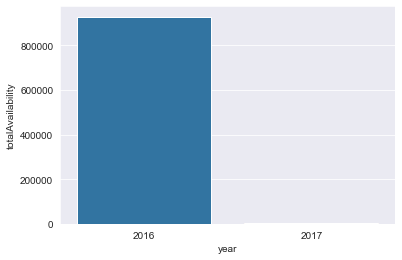

In [25]:
sns.barplot(x=dfSEA_year_avail.index, y=dfSEA_year_avail.totalAvailability, data=dfSEA_year_avail)

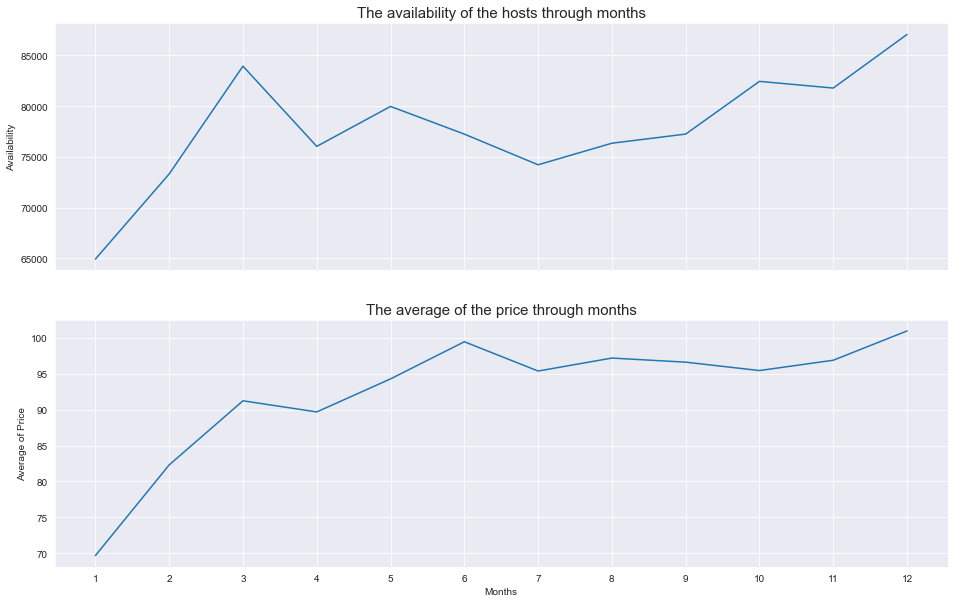

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(16,10), sharex=True)

# Availability by months chart
sns.lineplot(x=dfSEA_month_avail.index, y=dfSEA_month_avail['totalAvailability'], data=dfSEA_month_avail, ax=axes[0])
plt.xticks(np.arange(1, 13))
axes[0].set_xlabel('Months')
axes[0].set_ylabel('Availability')
axes[0].set_title('The availability of the hosts through months', fontdict={'fontsize': 15})

# Average Price by months chart
sns.lineplot(x=dfSEA_month_avgPrice.index, y=dfSEA_month_avgPrice['averagePrice'], data=dfSEA_month_avgPrice, ax=axes[1])
plt.xticks(np.arange(1, 13))
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Average of Price')
axes[1].set_title('The average of the price through months', fontdict={'fontsize': 15})

#save img
plt.savefig('Seattle Airbnb by Seasons.png')

plt.show()

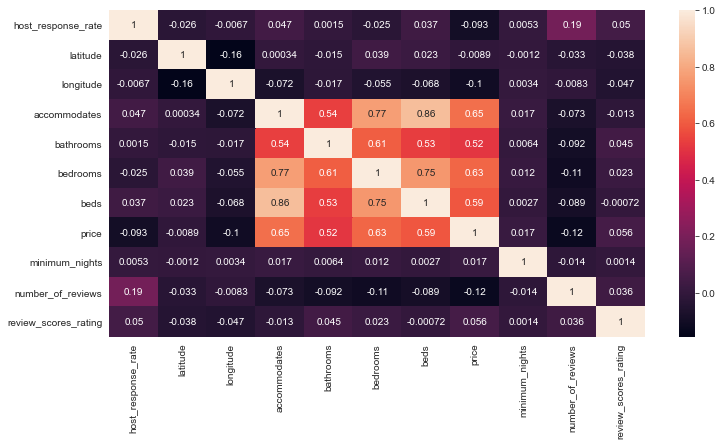

In [27]:
# correlation of features
plt.figure(figsize=(12,6))
sns.heatmap(dfSEA_listing_new.corr(), annot=True)

In [28]:
# check correlation of price column with other features
price_corr = dfSEA_listing_new.corr()['price'].sort_values(ascending=False)
price_corr.drop('price', inplace=True)
dfSEA_price_corr = pd.DataFrame(price_corr)
dfSEA_price_corr.rename(columns={'price':'priceCorr'}, inplace=True)
dfSEA_price_corr

,priceCorr
accommodates,0.652218
bedrooms,0.627720
beds,0.589525
bathrooms,0.516424
review_scores_rating,0.055551
minimum_nights,0.017297
latitude,-0.008904
host_response_rate,-0.092520
longitude,-0.102420
number_of_reviews,-0.124695


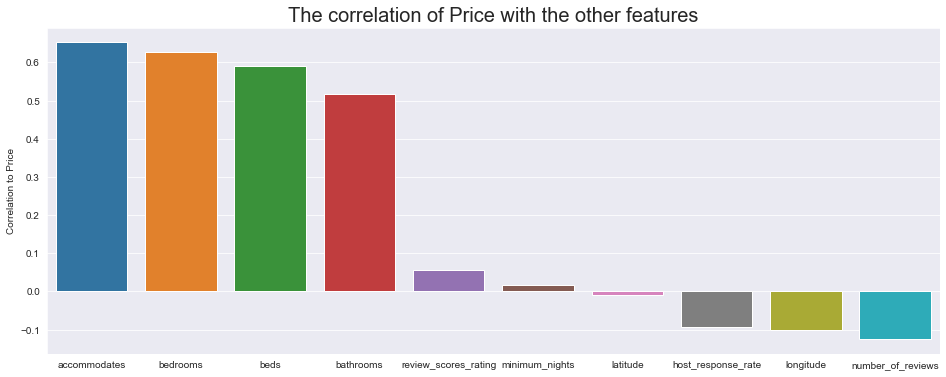

In [29]:
# Bar chart of price correlation
plt.figure(figsize=(16,6))
sns.barplot(x=dfSEA_price_corr.index, y=dfSEA_price_corr['priceCorr'], data=dfSEA_price_corr)
plt.title('The correlation of Price with the other features', fontdict={'fontsize':20})
plt.ylabel('Correlation to Price')

#save img
plt.savefig('PriceCorrelation.png')
plt.show()

In [30]:
# create new df of top correlation with Price and fill NaN values with mode of each column 
dfSEA_top_priceCorr = dfSEA_listing_new[['accommodates', 'bedrooms', 'beds', 'bathrooms', 'price']]
dfSEA_top_priceCorr.fillna({'bedrooms': dfSEA_top_priceCorr['bedrooms'].mode()[0], 
                            'beds': dfSEA_top_priceCorr['beds'].mode()[0],
                           'bathrooms': dfSEA_top_priceCorr['bathrooms'].mode()[0]}, inplace=True)
dfSEA_top_priceCorr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   accommodates  3818 non-null   int64  
 1   bedrooms      3818 non-null   float64
 2   beds          3818 non-null   float64
 3   bathrooms     3818 non-null   float64
 4   price         3818 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 149.3 KB


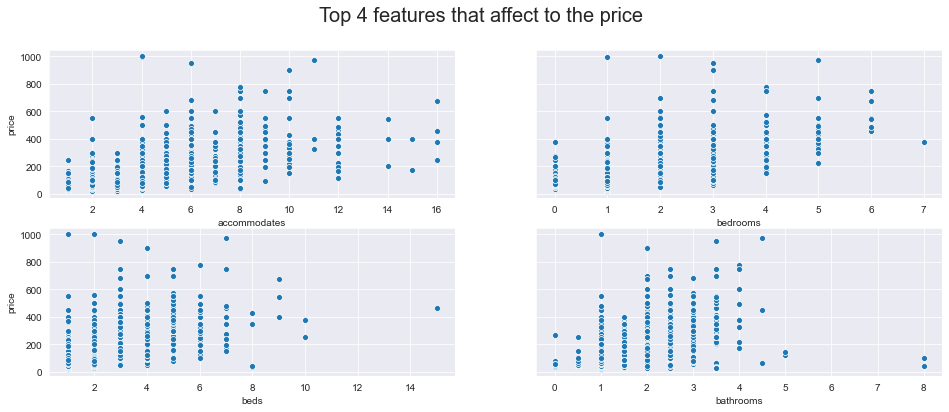

In [31]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(16, 6))
fig.suptitle('Top 4 features that affect to the price', fontsize=20)

sns.scatterplot(x=dfSEA_top_priceCorr['accommodates'], y=dfSEA_top_priceCorr['price'], data=dfSEA_top_priceCorr, ax=axes[0][0])
sns.scatterplot(x=dfSEA_top_priceCorr['bedrooms'], y=dfSEA_top_priceCorr['price'], data=dfSEA_top_priceCorr, ax=axes[0][1])
sns.scatterplot(x=dfSEA_top_priceCorr['beds'], y=dfSEA_top_priceCorr['price'], data=dfSEA_top_priceCorr, ax=axes[1][0])
sns.scatterplot(x=dfSEA_top_priceCorr['bathrooms'], y=dfSEA_top_priceCorr['price'], data=dfSEA_top_priceCorr, ax=axes[1][1])

#save img
plt.savefig('TopFeatures.png')
plt.show()

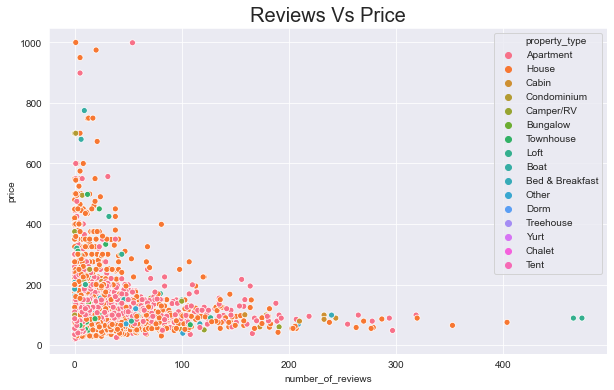

In [32]:
# No. of Review vs Price
plt.figure(figsize=(10,6))
sns.scatterplot(x=dfSEA_listing_new['number_of_reviews'], y=dfSEA_listing_new['price'], data=dfSEA_listing_new, hue=dfSEA_listing_new['property_type'])
plt.title('Reviews Vs Price', fontsize=20)
#save img
plt.savefig('ReviewVsPrice.png')
plt.show()

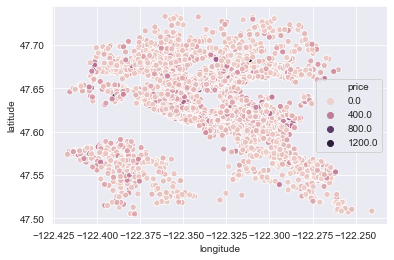

In [33]:
sns.scatterplot(x=dfSEA_listing_new['longitude'], y=dfSEA_listing_new['latitude'], data=dfSEA_listing_new, hue=dfSEA_listing_new['price'])
plt.show()

- In the chart above, we can see that there's no correlation between the price and the hosts' locations. 

In [34]:
#extract list of comments and concatenate as a String 
com_arr = dfSEA_reviews['comments'].values
comments = ' '.join(com_arr)

#remove specific control characters
remove_char = ['\n','\r']
for char in remove_char:
    comments = comments.replace(char, ' ')

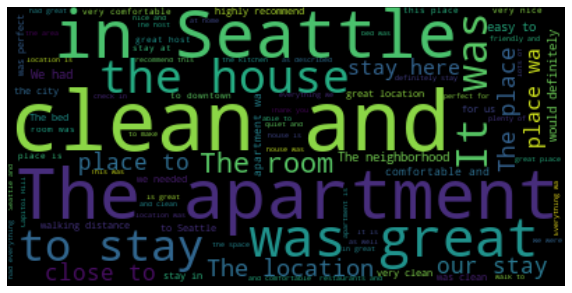

In [35]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wc = WordCloud(background_color='black', stopwords=stopwords)
wc.generate(comments)
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
print('The average of review scores is {}'.format(dfSEA_listing_new['review_scores_rating'].mean()))

The average of review scores is 94.53926206244087
